## 1. Data Cleaning & Preprocessing


In [ ]:
import pandas as pd

df = pd.read_csv('traffic.csv')
df.head()


,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [ ]:
df.rename(columns={
    'date': 'event_date'
}, inplace=True)


In [ ]:
df['event_date'] = pd.to_datetime(df['event_date'])


In [ ]:
df.isnull().sum()



,0
event,0
event_date,0
country,11
city,11
artist,37
album,5
track,5
isrc,7121
linkid,0


In [ ]:
df['country'] = df['country'].fillna('Unknown')
df['city'] = df['city'].fillna('Unknown')
df['artist'] = df['artist'].fillna('Unknown Artist')
df['album'] = df['album'].fillna('Unknown Album')
df['track'] = df['track'].fillna('Unknown Track')
df['isrc'] = df['isrc'].fillna('Unknown ISRC')


In [ ]:
df.isnull().sum()



,0
event,0
event_date,0
country,0
city,0
artist,0
album,0
track,0
isrc,0
linkid,0


## 2. Basic Metrics


In [ ]:
total_events = len(df)
total_events


226278

In [ ]:
total_sessions = df['linkid'].nunique()
total_sessions


3839

In [ ]:
total_users = total_sessions
total_users


3839

In [ ]:
avg_clicks_per_session = total_events / total_sessions
avg_clicks_per_session

58.941911956238606

## 3. Bounce Rate Analysis


In [ ]:
clicks_per_session = df.groupby('linkid').size()

bounced_sessions = clicks_per_session[clicks_per_session == 1].count()

bounce_rate = (bounced_sessions / total_sessions) * 100
bounce_rate


np.float64(34.01927585308674)

## 4. Content Performance


In [ ]:
df['artist'].value_counts().head(10)


,count
artist,
Tesher,40841
Anne-Marie,10650
Tundra Beats,9751
"Surf Mesa, Emilee",7533
"DMNDS, Strange Fruits Music, Fallen Roses, Lujavo, Nito-Onna",5512
Reyanna Maria,5437
"Shawn Mendes, Tainy",5409
"50 Cent, Olivia",5367
Roddy Ricch,5093


In [ ]:
df['track'].value_counts().head(10)


,count
track,
Jalebi Baby,40841
Beautiful,10658
Beautiful Day,9751
ily (i love you baby) (feat. Emilee),7533
So Pretty,5664
Calabria (feat. Lujavo & Nito-Onna),5512
Summer of Love (Shawn Mendes & Tainy),5409
Candy Shop,5375
Late At Night,5036


## 5. Geographic Analysis


In [ ]:
df['country'].value_counts().head(10)


,count
country,
Saudi Arabia,47334
India,42992
United States,32558
France,15661
Iraq,8260
United Kingdom,5970
Pakistan,5644
Germany,4794
United Arab Emirates,3702


In [ ]:
df['city'].value_counts().head(10)


,count
city,
Jeddah,22791
Riyadh,17454
Unknown,16672
Hyderabad,3682
Dammam,3276
Erbil,3105
Kuwait City,3010
Lucknow,2808
Muscat,2717


## 6. Visualizations


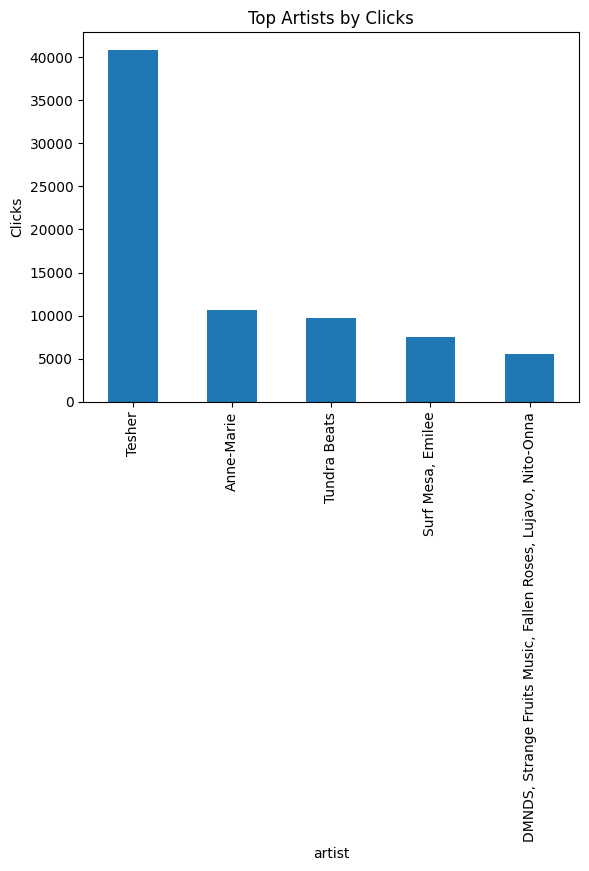

In [ ]:
import matplotlib.pyplot as plt

df['artist'].value_counts().head(5).plot(kind='bar')
plt.title('Top Artists by Clicks')
plt.ylabel('Clicks')
plt.show()


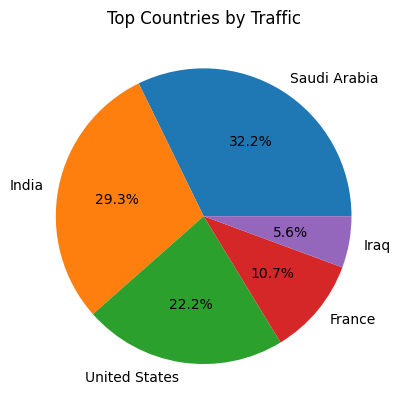

In [ ]:
df['country'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Countries by Traffic')
plt.ylabel('')
plt.show()


### Key Insights
- The dataset contains a high volume of click events, indicating strong overall activity.
- User engagement is healthy, with a bounce rate of approximately 34%.
- A small number of artists and tracks generate the majority of traffic.
- Traffic is concentrated in specific countries and cities, suggesting opportunities for targeted marketing.



Final Insights & Conclusion

The analysis shows strong user engagement with an average of nearly 59 clicks per session. While the bounce rate is around 34%, most users interact beyond a single click. Content performance is driven by a small number of top artists and tracks, and traffic is concentrated in specific regions. These insights can help improve content promotion, regional targeting, and conversion strategies.
